[@ggruszczynski](https://github.com/ggruszczynski)

# Direct Methods

Direct Methods allow to obtain the exact solution in finitely many operations.

The problem is with scale. 
For example, the well known Gauss elimination algorithm has $O(n^3)$ arithmetic complexity [<sup>1</sup>](#fn1).
The real world problems may have a very large number of equations, like $(10^6 - 10^8)$.
Think of a 3D, uniformly discretized mesh block like 1000x1000x1000 = $10^9$.

Last but not least, the nonlinear systems of equations are always solved by iterative algorithms.

---
<span id="fn1"> [Gauss algorithm](https://en.wikipedia.org/wiki/Gaussian_elimination#Computational_efficiency) </span>

# Iterative methods 

## Intuitive Example - direct iteration method

Suppose, that we would like to solve a simple equation

$$ 10x = 500 $$

Let us rewrite this equation into two equivalent forms:

$$ 6x = 500 - 4x \hspace{5em} and \hspace{5em}  4x = 500 - 6x $$

Each form can be adopted to generate an iterative algorithm (let's call them version A and B).

$$ x_A^{k+1} = (500 - 4x_A^k)/6 \hspace{5em} and \hspace{5em}  x_B^{k+1} = (500 - 6x_B^k)/4 $$



### Task

Write both versions of the iterative algorithm and try to solve the equations.

Start with $ x^{(0)} = 37 $

In [2]:
import numpy as np                 #here we load numpy
import matplotlib.pyplot as plt
import time, sys                   #and load some utilities
from numpy import array, zeros, diag, diagflat, dot

np.set_printoptions(precision=3, suppress=True)

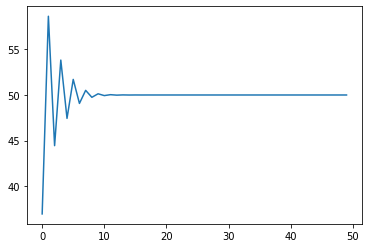

In [3]:
x_IC = 37

N = 50 # number of iterations
x_A = np.zeros(N)
x_A[0] = x_IC

x_B = np.zeros(N)
x_B[0] = x_IC


for i in range(N-1):
    # x_A[i+1] = (500 - 4*x_A[i])/6
    # x_B[i+1] = (500 - 6*x_B[i])/4

    x_A[i+1] = (500 - 4*x_A[i] + np.sin(x_A[i]))/6
    x_B[i+1] = (500 - 6*x_B[i] + np.sin(x_A[i]))/4

iterations = np.arange(N)
plt.plot(iterations, x_A)
# plt.plot(iterations, x_B)


### Task

Modify the algorithm to solve $ 10x = 500 + sin(x) $

### Question

How an **intuitive** convergence criterion can be formulated?

### Answer

The convergence is related to the fact the bigger part of the unknown $ x $ was used to form a new iteration.

# System of linear Equations

Now, we will focus on iterative methods for solving system of linear equations:

$$
\mathbb{A} \boldsymbol{x} = \boldsymbol{b}
$$

## Jacobi iterative Method

Let us decompose the $\mathbb{A}$ matrix into a Lower triangular matrix, Diagonal and Upper triangular matrix:

$$
\mathbb{A} = \mathbb{L} + \mathbb{D} + \mathbb{U}
$$


$$
\underbrace{
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{bmatrix}
}_{\mathbb{A}}
= 
\underbrace{
\begin{bmatrix}
0 & 0 & 0 \\
4 & 0 & 0 \\
7 & 8 & 0 \\
\end{bmatrix}
}_{\mathbb{L}}
+
\underbrace{
\begin{bmatrix}
1 & 0 & 0 \\
0 & 5 & 0  \\
0 & 0 & 9 \\
\end{bmatrix}
}_{\mathbb{D}}
+
\underbrace{
\begin{bmatrix}
0 & 2 & 3 \\
0 & 0 & 6 \\
0 & 0 & 0 \\
\end{bmatrix}
}_{\mathbb{U}}
$$



In [4]:
A = [[1,2,3],[4,5,6],[7,8,9]]

L = np.tril(A,-1)
D = diagflat(diag(A))  # diag(A) - diagonal vector, diagflat(vector) - matrix form
U = np.triu(A,1)
print(f"L = \n{L}")
print(f"D = \n{D}")
print(f"U = \n{U}")

print(f"D^-1 = \n{np.linalg.inv(D)}")



L = 
[[0 0 0]
 [4 0 0]
 [7 8 0]]
D = 
[[1 0 0]
 [0 5 0]
 [0 0 9]]
U = 
[[0 2 3]
 [0 0 6]
 [0 0 0]]
D^-1 = 
[[1.    0.    0.   ]
 [0.    0.2   0.   ]
 [0.    0.    0.111]]


The system $ \mathbb{A} \boldsymbol{x} = \boldsymbol{b}$, can be rewrtitten as:

$$
\mathbb{D} \boldsymbol{x} = -(\mathbb{L} + \mathbb{U})\boldsymbol{x}  + \boldsymbol{b}
$$

Next, the iterative approach can be proposed as

$$
\mathbb{D} \boldsymbol{x}^{k+1} = -(\mathbb{L} + \mathbb{U})\boldsymbol{x}^k  + \boldsymbol{b}
$$

or in an equivalent form:

$$
\boldsymbol{x}^{k+1} = 
\mathbb{D}^{-1} \left(\boldsymbol{b} - (\mathbb{L} + \mathbb{U})\boldsymbol{x}^k \right)
$$

Using index notation:

$$
x_{i}^{k+1}=\frac{1}{a_{i i}}\left(b_{i}-\sum_{j=1}^{i-1} a_{i j} x_{j}^{k}-\sum_{j=i+1}^{n} a_{i j} x_{j}^{k}\right), i=1, \ldots, n
$$


In [5]:
# Let us define the study case:

# An ugly Matrix
# A = np.array([[ 4, -1, -6, 0],
#               [-5, -4, 10, 8],
#               [ 0,  9,  4, -2],
#               [ 1,  0, -7, 5]])

# b = np.array([2, 21, -12, -6])

# A nice Matrix 
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0., 3., -1., 8.]])
b = np.array([6.0, 25.0, -11.0, 15.0])

initial_guess = np.zeros(4)

alpha = 0.5 # Relaxation factor
N = 25 # number of iterations

iterations = np.arange(N)


jacobi: [ 1.  2. -1.  1.]
np.linalg.solve(A, b): [ 1.  2. -1.  1.]


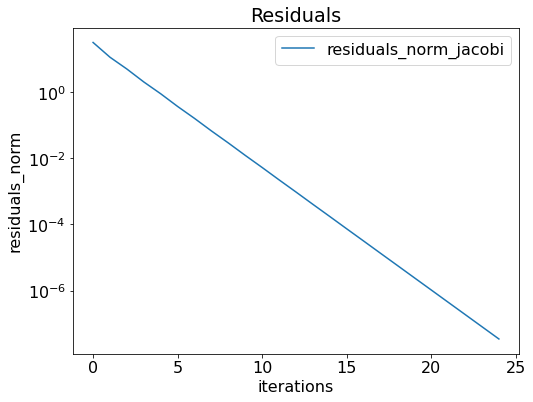

In [6]:

def jacobi(A,b,N,x0):
    # https://www.quantstart.com/articles/Jacobi-Method-in-Python-and-NumPy/
    d = diag(A)             # this is a vector
    LU = A - diagflat(d)    # diagflat() puts the values of the vector on the diagonal

    x = np.copy(x0)
    residuals_norm = np.zeros(N)
    # Iterate for N times
    for i in range(N):
        residual = b - A@x
        residuals_norm[i] = np.linalg.norm(residual)
        x = (b - LU@x) / d
    return x, residuals_norm




x_jacobi, residuals_norm_jacobi = jacobi(A,b,N,initial_guess)
print(f"jacobi: {x_jacobi}")


x_np = np.linalg.solve(A, b)
print(f"np.linalg.solve(A, b): {x_np}")


plt.rcParams.update({'font.size': 16})
figure, axis = plt.subplots(1, 1, figsize=(8, 6))
# plt.subplots_adjust(hspace=1)
axis.set_title('Residuals')
axis.plot(iterations, residuals_norm_jacobi, label=r'residuals_norm_jacobi')
axis.set_yscale('log')
axis.set_xlabel('iterations')
axis.set_ylabel('residuals_norm')
axis.legend(loc="upper right")




## Gauss-Seidel Method

Observe, that variables ($x$) with lower indices ($j < i$) are already known at $k+1$ iteration, thus they can be inserted 'on the fly'  to enhance the convergence

$$
(\mathbb{L} + \mathbb{D}) \boldsymbol{x} = -\mathbb{U}\boldsymbol{x}  + \boldsymbol{b}
$$

Next, the iterative approach can be proposed as

$$
(\mathbb{L} + \mathbb{D})  \boldsymbol{x}^{k+1} = -\mathbb{U}\boldsymbol{x}^k  + \boldsymbol{b} \Leftrightarrow \\
\Leftrightarrow \boldsymbol{x}^{k+1} = \mathbb{D}^{-1} \left(-\mathbb{L} \boldsymbol{x}^{k+1} -\mathbb{U}\boldsymbol{x}^k  + \boldsymbol{b} \right)
$$

Using index notation:
$$
x_{i}^{k+1}=\frac{1}{a_{i i}}\left(b_{i}-\sum_{j=1}^{i-1} a_{i j} x_{j}^{k+1}-\sum_{j=i+1}^{n} a_{i j} x_{j}^{k}\right), i=1, \ldots, n
$$



gauss_seidel:		[ 1.  2. -1.  1.]
np.linalg.solve(A, b): [ 1.  2. -1.  1.]


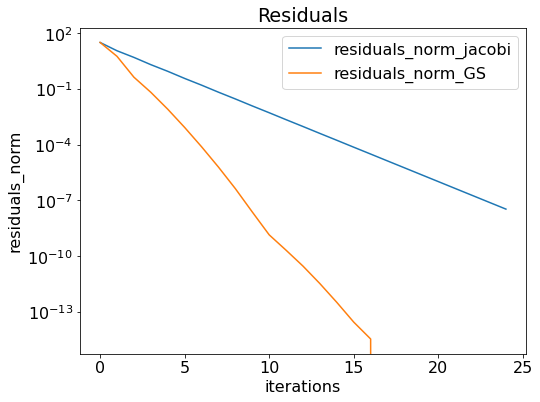

In [7]:
def gauss_seidel(A, b, N, x0):
    # https://en.wikipedia.org/wiki/Gauss%E2%80%93Seidel_method
    x = np.copy(x0)
    d = diag(A)

    L = np.tril(A,-1)
    # D = diagflat(diag(A))
    U = np.triu(A,1)

    residuals_norm = np.zeros(N)

    for t in range(N):
        residual = b - A@x
        residuals_norm[t] = np.linalg.norm(residual)

        for i in range(len(x)):
            x[i] = (-L[i,:] @ x - U[i,:] @ x + b[i])/d[i]

    return x, residuals_norm

x_GS, residuals_norm_GS = gauss_seidel(A,b,N,initial_guess)
print(f"gauss_seidel:\t\t{x_GS}")

x_np = np.linalg.solve(A, b)
print(f"np.linalg.solve(A, b): {x_np}")

plt.rcParams.update({'font.size': 16})
figure, axis = plt.subplots(1, 1, figsize=(8, 6))
axis.set_title('Residuals')
axis.plot(iterations, residuals_norm_jacobi, label=r'residuals_norm_jacobi')
axis.plot(iterations, residuals_norm_GS, label=r'residuals_norm_GS')
axis.set_yscale('log')
axis.set_xlabel('iterations')
axis.set_ylabel('residuals_norm')
axis.legend(loc="upper right")


## Errors and Residuals

Let us denote the exact solution by $ \boldsymbol{x} $.

### Definitions
The error is defined as:

$$
\boldsymbol{e}^k = \boldsymbol{x} - \boldsymbol{x}^k
$$

The residuum is defined as:

$$
\boldsymbol{r}^k = \boldsymbol{b} - \boldsymbol{b}^k = \boldsymbol{b} - \mathbb{A} \boldsymbol{x}^k = \mathbb{A}(\boldsymbol{x} - \boldsymbol{x}^k) = \mathbb{A} \boldsymbol{e}^k
$$

Consider an iterative method:

$$
\boldsymbol{x}^{k+1} = \boldsymbol{x}^k + \boldsymbol{p}^k
$$

where $ \boldsymbol{p}$ is a correction between iterations.

Observe that if you calculate the error... and add it to the $\boldsymbol{x}^k$ you should get an exact solution :)

Let us state for a while that  $  \boldsymbol{p} =  \boldsymbol{e} = \mathbb{A}^{-1}\boldsymbol{r}$

$$
\boldsymbol{x}^{k+1} = \boldsymbol{x}^k + \underbrace{\mathbb{A}^{-1}\boldsymbol{r}^k}_{\boldsymbol{p}^k} = \boldsymbol{x}^k + \mathbb{A}^{-1}\underbrace{(\boldsymbol{b} - \mathbb{A}\boldsymbol{x}^k)}_{\boldsymbol{r}^k} \\
= \boldsymbol{x}^k - \mathbb{A}^{-1}\mathbb{A}\boldsymbol{x}^k + \mathbb{A}^{-1}\boldsymbol{b} \\
= \mathbb{A}^{-1}\boldsymbol{b}
$$

The problem is, the we do not know $\mathbb{A}^{-1}$, and we do not want to calculate it as it is cumbersome.
Instead, we would like to approximate it with another, **similar** matrix, which has better numerical properties (is easy to invert).
Such a matrix is called **preconditioner**.



## Jacobi method - revisited

Notice, that in the case of Jacobi method, the $\mathbb{A}$ matrix is approximated by its diagonal $\mathbb{D}$:

$$
\boldsymbol{x}^{k+1} = \boldsymbol{x}^k + \boldsymbol{p}^k = \boldsymbol{x}^k + \underbrace{\mathbb{D}^{-1}}_{\sim \mathbb{A}^{-1}}\boldsymbol{r}^k = \boldsymbol{x}^k + \underbrace{\mathbb{D}^{-1}  (\boldsymbol{b} - \mathbb{A}\boldsymbol{x}^k)}_{\boldsymbol{p}^k}
$$

Which is equivalant to the formula presented before:

$$
\boldsymbol{x}^{k+1} = \underbrace{\boldsymbol{x}^k - \mathbb{D}^{-1} \mathbb{D} \boldsymbol{x}^k}_{=0} + 
\underbrace{\mathbb{D}^{-1} \left(\boldsymbol{b} - (\mathbb{L} + \mathbb{U})\boldsymbol{x}^k \right)}_{\boldsymbol{\hat{p}}^k}
$$


## Relaxation

Another 'trick', which helps to converge an iterative method, is to introduce a relaxation parameter, $\alpha$.

$$
\boldsymbol{x}^{k+1} 
= (1 - \alpha) \boldsymbol{x}^k + \alpha \boldsymbol{\hat{p}}^k 
= \boldsymbol{x}^k + \alpha \underbrace{(\boldsymbol{\hat{p}}^k - \boldsymbol{x}^k)}_{\boldsymbol{p}^k} \\
$$

From the implementation point of view, it may be more convienient to use $\boldsymbol{\hat{p}} = \boldsymbol{p}^k + \boldsymbol{x}^k$.

### Task

Introduce the relaxation to the Jacobi and Gauss-Seidel method.

* Jacobi: 
$$
\boldsymbol{\hat{p}}^k = \mathbb{D}^{-1} \left(\boldsymbol{b} - (\mathbb{L} + \mathbb{U})\boldsymbol{x}^k \right)
$$

* Gauss-Seidel:

$$
\boldsymbol{\hat{p}}^k = \mathbb{D}^{-1} \left(-\mathbb{L} \boldsymbol{x}^{k+1} -\mathbb{U}\boldsymbol{x}^k  + \boldsymbol{b} \right)
$$



jacobi_relaxation 0.5: [ 1.  2. -1.  1.]
gauss_seidel_SOR 0.5: [ 1.  2. -1.  1.]
np.linalg.solve(A, b): [ 1.  2. -1.  1.]


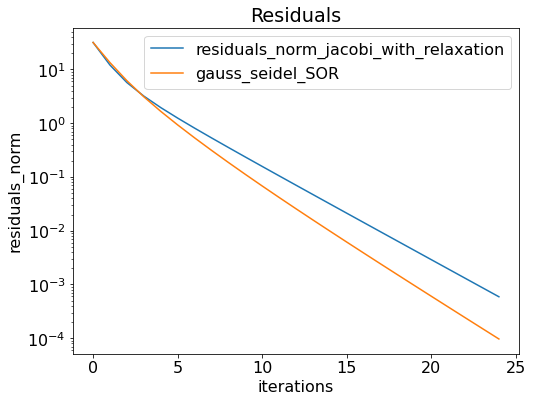

In [8]:
def jacobi_with_relaxation(A,b,N,x0,alpha):
    x = np.copy(x0)
    d = diag(A)

    residuals_norm = np.zeros(N)
    for i in range(N):
        residual = b - A@x
        residuals_norm[i] = np.linalg.norm(residual)
        p = residual/d
        x = x + alpha*p

    return x, residuals_norm


def gauss_seidel_SOR(A,b,N,x0, alpha=1):
    # https://en.wikipedia.org/wiki/Successive_over-relaxation
    x = np.copy(x0)
    d = diag(A)

    L = np.tril(A,-1)
    # D = diagflat(diag(A))
    U = np.triu(A,1)

    residuals_norm = np.zeros(N)

    for t in range(N):
        residual = b - A@x
        residuals_norm[t] = np.linalg.norm(residual)

        for i in range(len(x)):
            x[i] = (1. - alpha)*x[i] + alpha*(-L[i,:] @ x - U[i,:] @ x + b[i])/d[i]

    return x, residuals_norm



x_jacobi_with_relaxation, residuals_norm_jacobi_with_relaxation = jacobi_with_relaxation(A,b,N,initial_guess,alpha)
print(f"jacobi_relaxation {alpha}: {x_jacobi_with_relaxation}")

x_GS_SOR, residuals_norm_GS_SOR = gauss_seidel_SOR(A,b,N,initial_guess,alpha)
print(f"gauss_seidel_SOR {alpha}: {x_GS_SOR}")

x_np = np.linalg.solve(A, b)
print(f"np.linalg.solve(A, b): {x_np}")


plt.rcParams.update({'font.size': 16})
figure, axis = plt.subplots(1, 1, figsize=(8, 6))
# plt.subplots_adjust(hspace=1)
axis.set_title('Residuals')
# axis.plot(iterations, residuals_norm_jacobi, label=r'residuals_norm_jacobi')
# axis.plot(iterations, residuals_norm_GS, label=r'residuals_norm_GS')
axis.plot(iterations, residuals_norm_jacobi_with_relaxation, label=r'residuals_norm_jacobi_with_relaxation')
axis.plot(iterations, residuals_norm_GS_SOR,label=r'gauss_seidel_SOR')
axis.set_yscale('log')
axis.set_xlabel('iterations')
axis.set_ylabel('residuals_norm')
axis.legend(loc="upper right")

## Optimal relaxation rate

It is immediately clear, that convergence rate depends on the $\alpha$ coefficient.
It would be beneficial, to tune the coefficient in each iteration:

$$
\mathbf{x}^{k+1} = \mathbf{x}^{k} + \alpha^k \mathbf{p}^k
$$

How the residual evolve in each step?
Let us multiply the formula above by $-\mathbf{A}$, next add $\mathbf{b}$ and use the definition of the residual.

$$
\mathbf{r}^{k+1} = \mathbf{r}^{k} - \alpha^k \mathbf{A} \mathbf{p}^k
$$

Square of the norm of the residual is equal to:

$$
\|\mathbf{r}^{k+1}\| = (\mathbf{r}^{k+1})^T \mathbf{r}^{k+1} =
(\mathbf{r}^{k} - \alpha^k \mathbf{A} \mathbf{p}^k)^T (\mathbf{r}^{k} - \alpha^k \mathbf{A} \mathbf{p}^k) =
$$

$$
(\mathbf{r}^{k})^T \mathbf{r}^{k} -
2 \alpha^k (\mathbf{r}^{k})^T \mathbf{A} \mathbf{p}^k +
(\alpha^k)^2(\mathbf{A}\mathbf{p}^k)^T \mathbf{A}\mathbf{p}^k
$$

Observe, that the square of the norm of the residual is a quadratic function of $\alpha^k$.
This function has a minimum, because the coefficient in front of $(\alpha^k)^2$ is positive.
Let us calculate the derivative with respect to $\alpha^k$:

$$
\frac{d}{d\alpha^k} \left( \|\mathbf{r}^{k+1}\| \right) =
-2(\mathbf{r}^{k})^T \mathbf{A} \mathbf{p}^k +
2 \alpha^k (\mathbf{A} \mathbf{p}^k)^T \mathbf{A} \mathbf{p}^k
$$

The minimum is when $\frac{d}{d\alpha^k} \left( \|\mathbf{r}^{k+1}\| \right) = 0$, which corresponds with

$$
\alpha^k = \frac{(\mathbf{r}^{k})^T \mathbf{A} \mathbf{p}^k}{(\mathbf{A} \mathbf{p}^k)^T \mathbf{A} \mathbf{p}^k}
$$

Scheme with such coefficient,$\alpha^k$, is called Minimal Residual Method --- **MINRES** (**metoda najmniejszych residuów**).

---
[CCFD: Laboratorium - Metody Iteracyjne, Ł. Łaniewski-Wołłk](http://ccfd.github.io/courses/metnum_lab3.html)


gauss_seidel_MINRES: [ 1.  2. -1.  1.]
np.linalg.solve(A, b): [ 1.  2. -1.  1.]


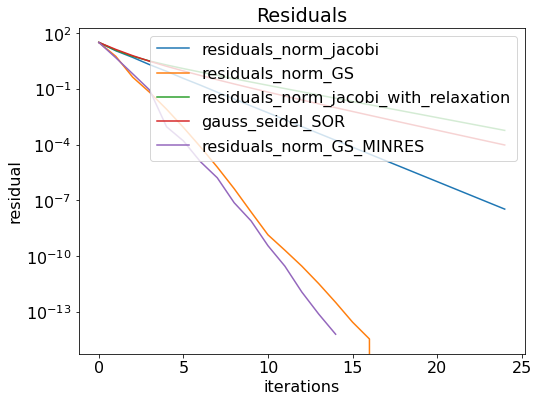

In [11]:
def gauss_seidel_MINRES(A,b,N,x0):
    x = np.copy(x0)
    d = diag(A)

    L = np.tril(A,-1)
    D = diagflat(diag(A))
    U = np.triu(A,1)

    p = np.zeros(len(x))
    
    residuals_norm = list()

    convergence_criteria = 1e-14
    iteration = 0 
    residual = b - A@x
    

    while np.linalg.norm(residual) > convergence_criteria and iteration < N:
    # while iteration < N: this fails when residuals --> 0
        residual = b - A@x
        residuals_norm.append(np.linalg.norm(residual))

        p = np.zeros(len(x))
        for i in range(len(x)):
            tmp = 0
            for j in range(i):
                tmp += A[i,j]*p[j]
            
            p[i] = (residual[i] - tmp)/A[i,i]
            
            # below is not that good...
            # phat = (-L[i,:] @ x - U[i,:] @ x + b[i])/d[i]
            # p[i] = phat - x[i]
            

            ## hack
            # alpha = 0.5
            # x[i]  = x[i]  + alpha *p[i] 
            # or 
            # x[i] = (1. - alpha)*x[i] + alpha*phat
        
       
        alpha = residual.transpose() @ (A @ p)
        alpha /= (A @ p).transpose() @ (A @ p)
        # alpha = 1  # For nice matrix it is equivalent with GS method
        x = x + alpha *p
        iteration +=1
        
    return x, residuals_norm



x_gauss_seidel_MINRES, residuals_norm_GS_MINRES = gauss_seidel_MINRES(A,b,N,initial_guess)
print(f"gauss_seidel_MINRES: {x_gauss_seidel_MINRES}")

x_np = np.linalg.solve(A, b)
print(f"np.linalg.solve(A, b): {x_np}")


# If the Hessian is positive definite
# (equivalently, has all eigenvalues positive) at x0, then f=f(x)=(x^T)*A*x attains a local minimum at f(x=x0).
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

if not is_pos_def(A):
    print("A is not positive definite.")

plt.rcParams.update({'font.size': 16})
figure, axis = plt.subplots(1, 1, figsize=(8, 6))
# plt.subplots_adjust(hspace=1)
axis.set_title('Residuals')
axis.plot(iterations, residuals_norm_jacobi, label=r'residuals_norm_jacobi')
axis.plot(iterations, residuals_norm_GS, label=r'residuals_norm_GS')
axis.plot(iterations, residuals_norm_jacobi_with_relaxation, label=r'residuals_norm_jacobi_with_relaxation')
axis.plot(iterations, residuals_norm_GS_SOR,label=r'gauss_seidel_SOR')
axis.plot(iterations[:len(residuals_norm_GS_MINRES)], residuals_norm_GS_MINRES, label=r'residuals_norm_GS_MINRES')
axis.set_yscale('log')
axis.set_xlabel('iterations')
axis.set_ylabel('residual')
axis.legend(loc="upper right")

## Questions:

1. How much memory is requirement to store $\boldsymbol{x}^{k+1}$ and $\boldsymbol{x}^k$ between iteration in Jacobi and Gauss-Seidel method?

2. How to parallelize the Jacobi and Gauss-Seidel method?

3. Why the Jacobi algorithm fails in case of the *ugly* matrix?

4. What is the difference between the *ugly* and the *nice* matrix?

5. How does the numerical routine, like `solve(A,b)`, the pick up the proper method?

6. Are there any special algorithms to store sparse matrices?

## Answers 

 1a. In Jacobi method both the $\boldsymbol{x}^{k+1}$ and $\boldsymbol{x}^k$ solution vectors have to be stored until the end of iteration. As a result, the required amount of memory is $memory = 2*len(x)*sizeof(float/double)$. 

 1b. In the Gauss-Seidel method just one solution vector, $x$, has to be stored as the new iteration ovewrites the previos one in an 'in place' manner.

 2. The Gauss-Seidel method is sequential, thus it can not be parallelized.
 
 3. The Jacobi Method fails in case of the ugly matrix, because it is not diagonally dominant.

 4. The *nice* matrix is diagonally dominant and positive definite.

 5. The numerical routine like `solve(A,b)` checks properties of the A matrix, the picks up the best method.

 6. To store a sparse matrix in an efficient way, only the nonzero elements are saved. 

 7. (Extra). The MINRES methods is a variant of the conjugate gradient method that avoids the LU decomposition and does not suffer from breakdown. MINRES minimizes the residual in the 2-norm. 

## References:

1. "Metody Numeryczne dla studentów technik informacyjnych", P. Tatjewski, Warszawa 2013
2. "Computational Fluid Dynamics - lecture notes", J. Rokicki, Warszawa 2014
<https://www.meil.pw.edu.pl/za/content/download/29896/156221/file/ComputationalFluidDynamics_20140910.pdf>
3. Metody Numeryczne -laboratorium 3, Łukasz Łaniewski-Wołłk,
<http://ccfd.github.io/courses/metnum_lab3.html>
4. <https://www.quantstart.com/articles/Jacobi-Method-in-Python-and-NumPy/>
5. <https://en.wikipedia.org/wiki/Successive_over-relaxation>
6. <https://towardsdatascience.com/what-is-a-positive-definite-matrix-181e24085abd>

## Historical notes

* Human Computers: <https://en.wikipedia.org/wiki/Computer_(job_description)>
